In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image, ImageDraw

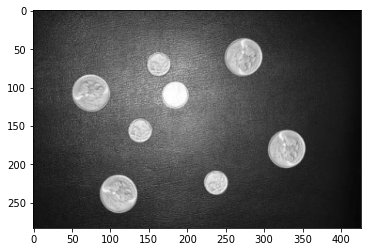

In [ ]:
pic = cv.imread('money.jpg')
plt.imshow(pic, cmap='gray')

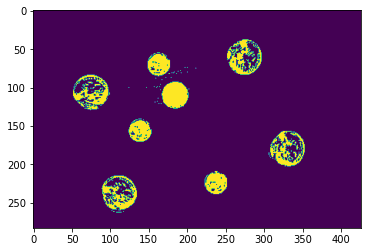

In [ ]:
img = cv.cvtColor(pic,cv.COLOR_BGR2GRAY)
for i in range(len(img)):
  for j in range(len(img[i])):
      if(img[i][j]<190):
        img[i][j]=0
      else:
        img[i][j]=255

plt.imshow(img)

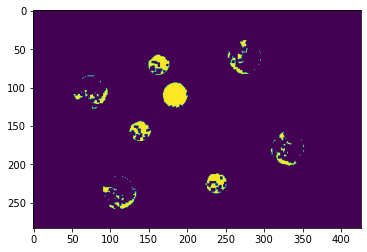

In [ ]:
kernel = np.ones((2, 2), 'uint8')
fg = cv.erode(img,None,iterations = 1)
plt.imshow(fg)

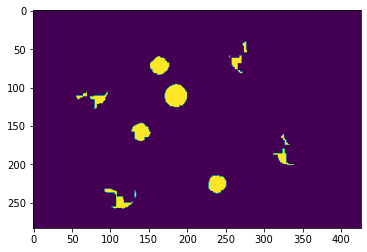

In [ ]:
fg1 = cv.dilate(fg,None,iterations = 2)
fg1 = cv.dilate(fg1,kernel,iterations = 2)
fg1 = cv.erode(fg1, None, iterations = 4)
plt.imshow(fg1)

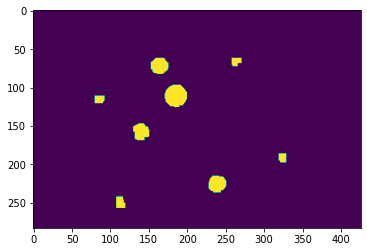

In [ ]:
fg2 = cv.erode(fg1, None, iterations = 3)
fg2 = cv.dilate(fg2, None, iterations = 4)
fg2 = cv.erode(fg2, None, iterations = 1)
plt.imshow(fg2)

In [ ]:
contours,_ = cv.findContours(fg2, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
len(contours)

8

In [ ]:
#plt.imshow(cv.drawContours(fg1, contours, -1, (0,255,0), 3))

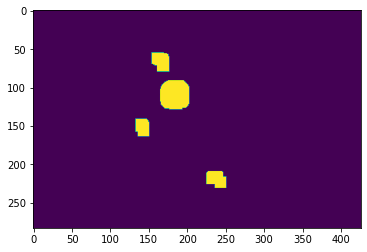

In [ ]:
small = fg.copy()

small = cv.erode(small, None, iterations = 3)
small = cv.dilate(small, None, iterations =8)
small = cv.erode(small, None, iterations = 1)
plt.imshow(small)

In [ ]:
contours2,_ = cv.findContours(small, cv.RETR_EXTERNAL , cv.CHAIN_APPROX_SIMPLE)
len(contours2)

4

In [ ]:
#TODO сделать покраску контуров монет

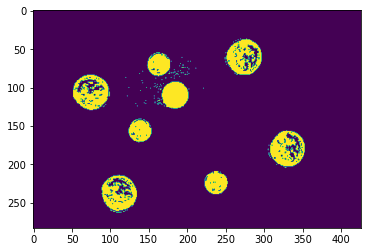

In [ ]:
ptc = cv.cvtColor(pic,cv.COLOR_BGR2GRAY)
for i in range(len(ptc)):
  for j in range(len(ptc[i])):
      if(ptc[i][j]<180):
        ptc[i][j] = 0
      else:
        ptc[i][j]=255
plt.imshow(ptc)

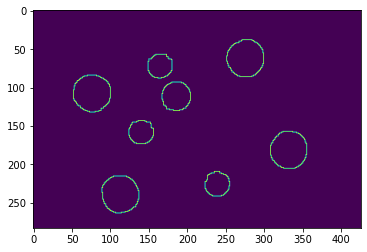

In [ ]:
kernel = np.ones((2, 2), 'uint8')
ptc2 = cv.erode(ptc, kernel, iterations = 1)
ptc2 = cv.dilate(ptc2, None,iterations = 3)
ptc2 = cv.dilate(ptc2, kernel,iterations = 2)
ptc2 = cv.erode(ptc2, None, iterations = 2)
ptcS = cv.erode(ptc2, None, iterations = 1)
for i in range(len(ptc2)):
  for j in range(len(ptc2[i])):
      if(ptc2[i][j]!=ptcS[i][j]):
       ptc2[i][j] = 255
      else:
        ptc2[i][j]=0
plt.imshow(ptc2)



In [ ]:
fcontours,_ = cv.findContours(ptc2, cv.RETR_EXTERNAL , cv.CHAIN_APPROX_SIMPLE)
len(fcontours[0])

70

 Маленькие монетки: 4 
 Большие монетки: 4


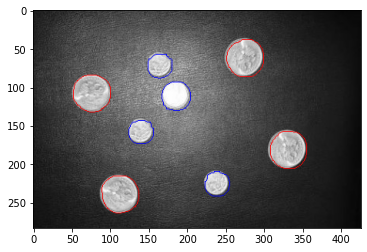

In [ ]:
imgCopy = pic
small = 0
big = 0
for i in range(len(fcontours)):
  if (len(fcontours[i])<50):
    cv.drawContours(imgCopy, fcontours, i, (0,0,255), 1)
    small+=1
  else:
    cv.drawContours(imgCopy, fcontours, i, (255,0,0), 1)
    big+=1

plt.imshow(imgCopy)
print(' Маленькие монетки:',small,'\n','Большие монетки:',big)

Больше монеты: 4
Маленькие монет: 4


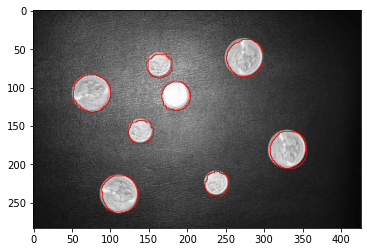

In [ ]:
pic2 = pic.copy()
for i in range(len(ptc2)):
  for j in range(len(ptc2[i])):
      if(ptc2[i][j]>0):
       pic2[i][j] = (255,0,0)
plt.imshow(pic2)
print('Больше монеты:',len(contours)-len(contours2))
print('Маленькие монет:',len(contours2))